In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
import datetime
import time
import math
import warnings
warnings.filterwarnings("ignore")
import glob

In [2]:
def read_label_data():
    label = {}
    for i in range(1, 7):
        data = 'REDD/low_freq/house_{}/labels.dat'.format(i)
        label[i] = {}
        with open(data) as d:
            for line in d:
                splitted_line = line.split(' ')
                label[i][int(splitted_line[0])] = splitted_line[1].strip() + '_' + splitted_line[0]
    return label

labels = read_label_data()
for i in range(1, 7):
    print('House #{}:'.format(i), labels[i], '\n')

House #1: {1: 'mains_1', 2: 'mains_2', 3: 'oven_3', 4: 'oven_4', 5: 'refrigerator_5', 6: 'dishwaser_6', 7: 'kitchen_outlets_7', 8: 'kitchen_outlets_8', 9: 'lighting_9', 10: 'washer_dryer_10', 11: 'microwave_11', 12: 'bathroom_gfi_12', 13: 'electric_heat_13', 14: 'stove_14', 15: 'kitchen_outlets_15', 16: 'kitchen_outlets_16', 17: 'lighting_17', 18: 'lighting_18', 19: 'washer_dryer_19', 20: 'washer_dryer_20'} 

House #2: {1: 'mains_1', 2: 'mains_2', 3: 'kitchen_outlets_3', 4: 'lighting_4', 5: 'stove_5', 6: 'microwave_6', 7: 'washer_dryer_7', 8: 'kitchen_outlets_8', 9: 'refrigerator_9', 10: 'dishwaser_10', 11: 'disposal_11'} 

House #3: {1: 'mains_1', 2: 'mains_2', 3: 'outlets_unknown_3', 4: 'outlets_unknown_4', 5: 'lighting_5', 6: 'electronics_6', 7: 'refrigerator_7', 8: 'disposal_8', 9: 'dishwaser_9', 10: 'furance_10', 11: 'lighting_11', 12: 'outlets_unknown_12', 13: 'washer_dryer_13', 14: 'washer_dryer_14', 15: 'lighting_15', 16: 'microwave_16', 17: 'lighting_17', 18: 'smoke_alarms_18'

In [5]:
def merge_data(house):
    path = 'REDD/low_freq/house_{}/'.format(house)
    file = path + 'channel_1.dat'
    df = pd.read_table(file, sep = ' ', names = ['unix_time', labels[house][1]],
                      dtype = {'unix_time': 'int64', labels[house][1]:'float64'})
    
    num_apps = len(glob.glob(path + 'channel*'))
    for i in range(2, num_apps + 1):
        file = path + 'channel_{}.dat'.format(i)
        data = pd.read_table(file, sep = ' ', names = ['unix_time', labels[house][i]],
                            dtype = {'unix_time': 'int64', labels[house][i]: 'float64'})
        df = pd.merge(df, data , how = 'inner', on = 'unix_time')
    df['timestamp'] = df['unix_time'].astype("datetime64[s]")
    df = df.set_index(df['timestamp'].values)
    df.drop(['unix_time', 'timestamp'], axis = 1)
    return df

df = {}
for i in range(1,3):
    df[i] = merge_data(i)

In [6]:
for i in range(1,3):
    print('House {} data has shape: '.format(i), df[i].shape)
    display(df[i].tail(3))

House 1 data has shape:  (406748, 22)


,unix_time,mains_1,mains_2,oven_3,oven_4,refrigerator_5,dishwaser_6,kitchen_outlets_7,kitchen_outlets_8,lighting_9,...,bathroom_gfi_12,electric_heat_13,stove_14,kitchen_outlets_15,kitchen_outlets_16,lighting_17,lighting_18,washer_dryer_19,washer_dryer_20,timestamp
2011-05-24 19:56:27,1306266987,235.46,38.61,0.0,0.0,190.0,0.0,24.0,20.0,2.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2011-05-24 19:56:27
2011-05-24 19:56:30,1306266990,235.98,38.77,0.0,0.0,189.0,0.0,24.0,20.0,2.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2011-05-24 19:56:30
2011-05-24 19:56:34,1306266994,235.29,38.83,0.0,0.0,186.0,0.0,26.0,20.0,2.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2011-05-24 19:56:34


House 2 data has shape:  (316840, 13)


,unix_time,mains_1,mains_2,kitchen_outlets_3,lighting_4,stove_5,microwave_6,washer_dryer_7,kitchen_outlets_8,refrigerator_9,dishwaser_10,disposal_11,timestamp
2011-05-22 23:59:01,1306108741,10.84,252.61,0.0,9.0,0.0,5.0,0.0,2.0,158.0,0.0,0.0,2011-05-22 23:59:01
2011-05-22 23:59:04,1306108744,10.88,253.02,0.0,9.0,0.0,4.0,0.0,2.0,160.0,0.0,0.0,2011-05-22 23:59:04
2011-05-22 23:59:08,1306108748,10.84,252.77,0.0,9.0,0.0,4.0,0.0,2.0,157.0,0.0,0.0,2011-05-22 23:59:08


In [7]:
dates = {}
for i in range(1,3):
    dates[i] = [str(time)[:10] for time in df[i].index.values]
    dates[i] = sorted(list(set(dates[i])))
    print('House {} data contain {}days from {} to {}'.format(i, len(dates[i]), dates[i][0], dates[i][-1]))
#    print(dates[i], '\n')

House 1 data contain 23days from 2011-04-18 to 2011-05-24
House 2 data contain 16days from 2011-04-18 to 2011-05-22


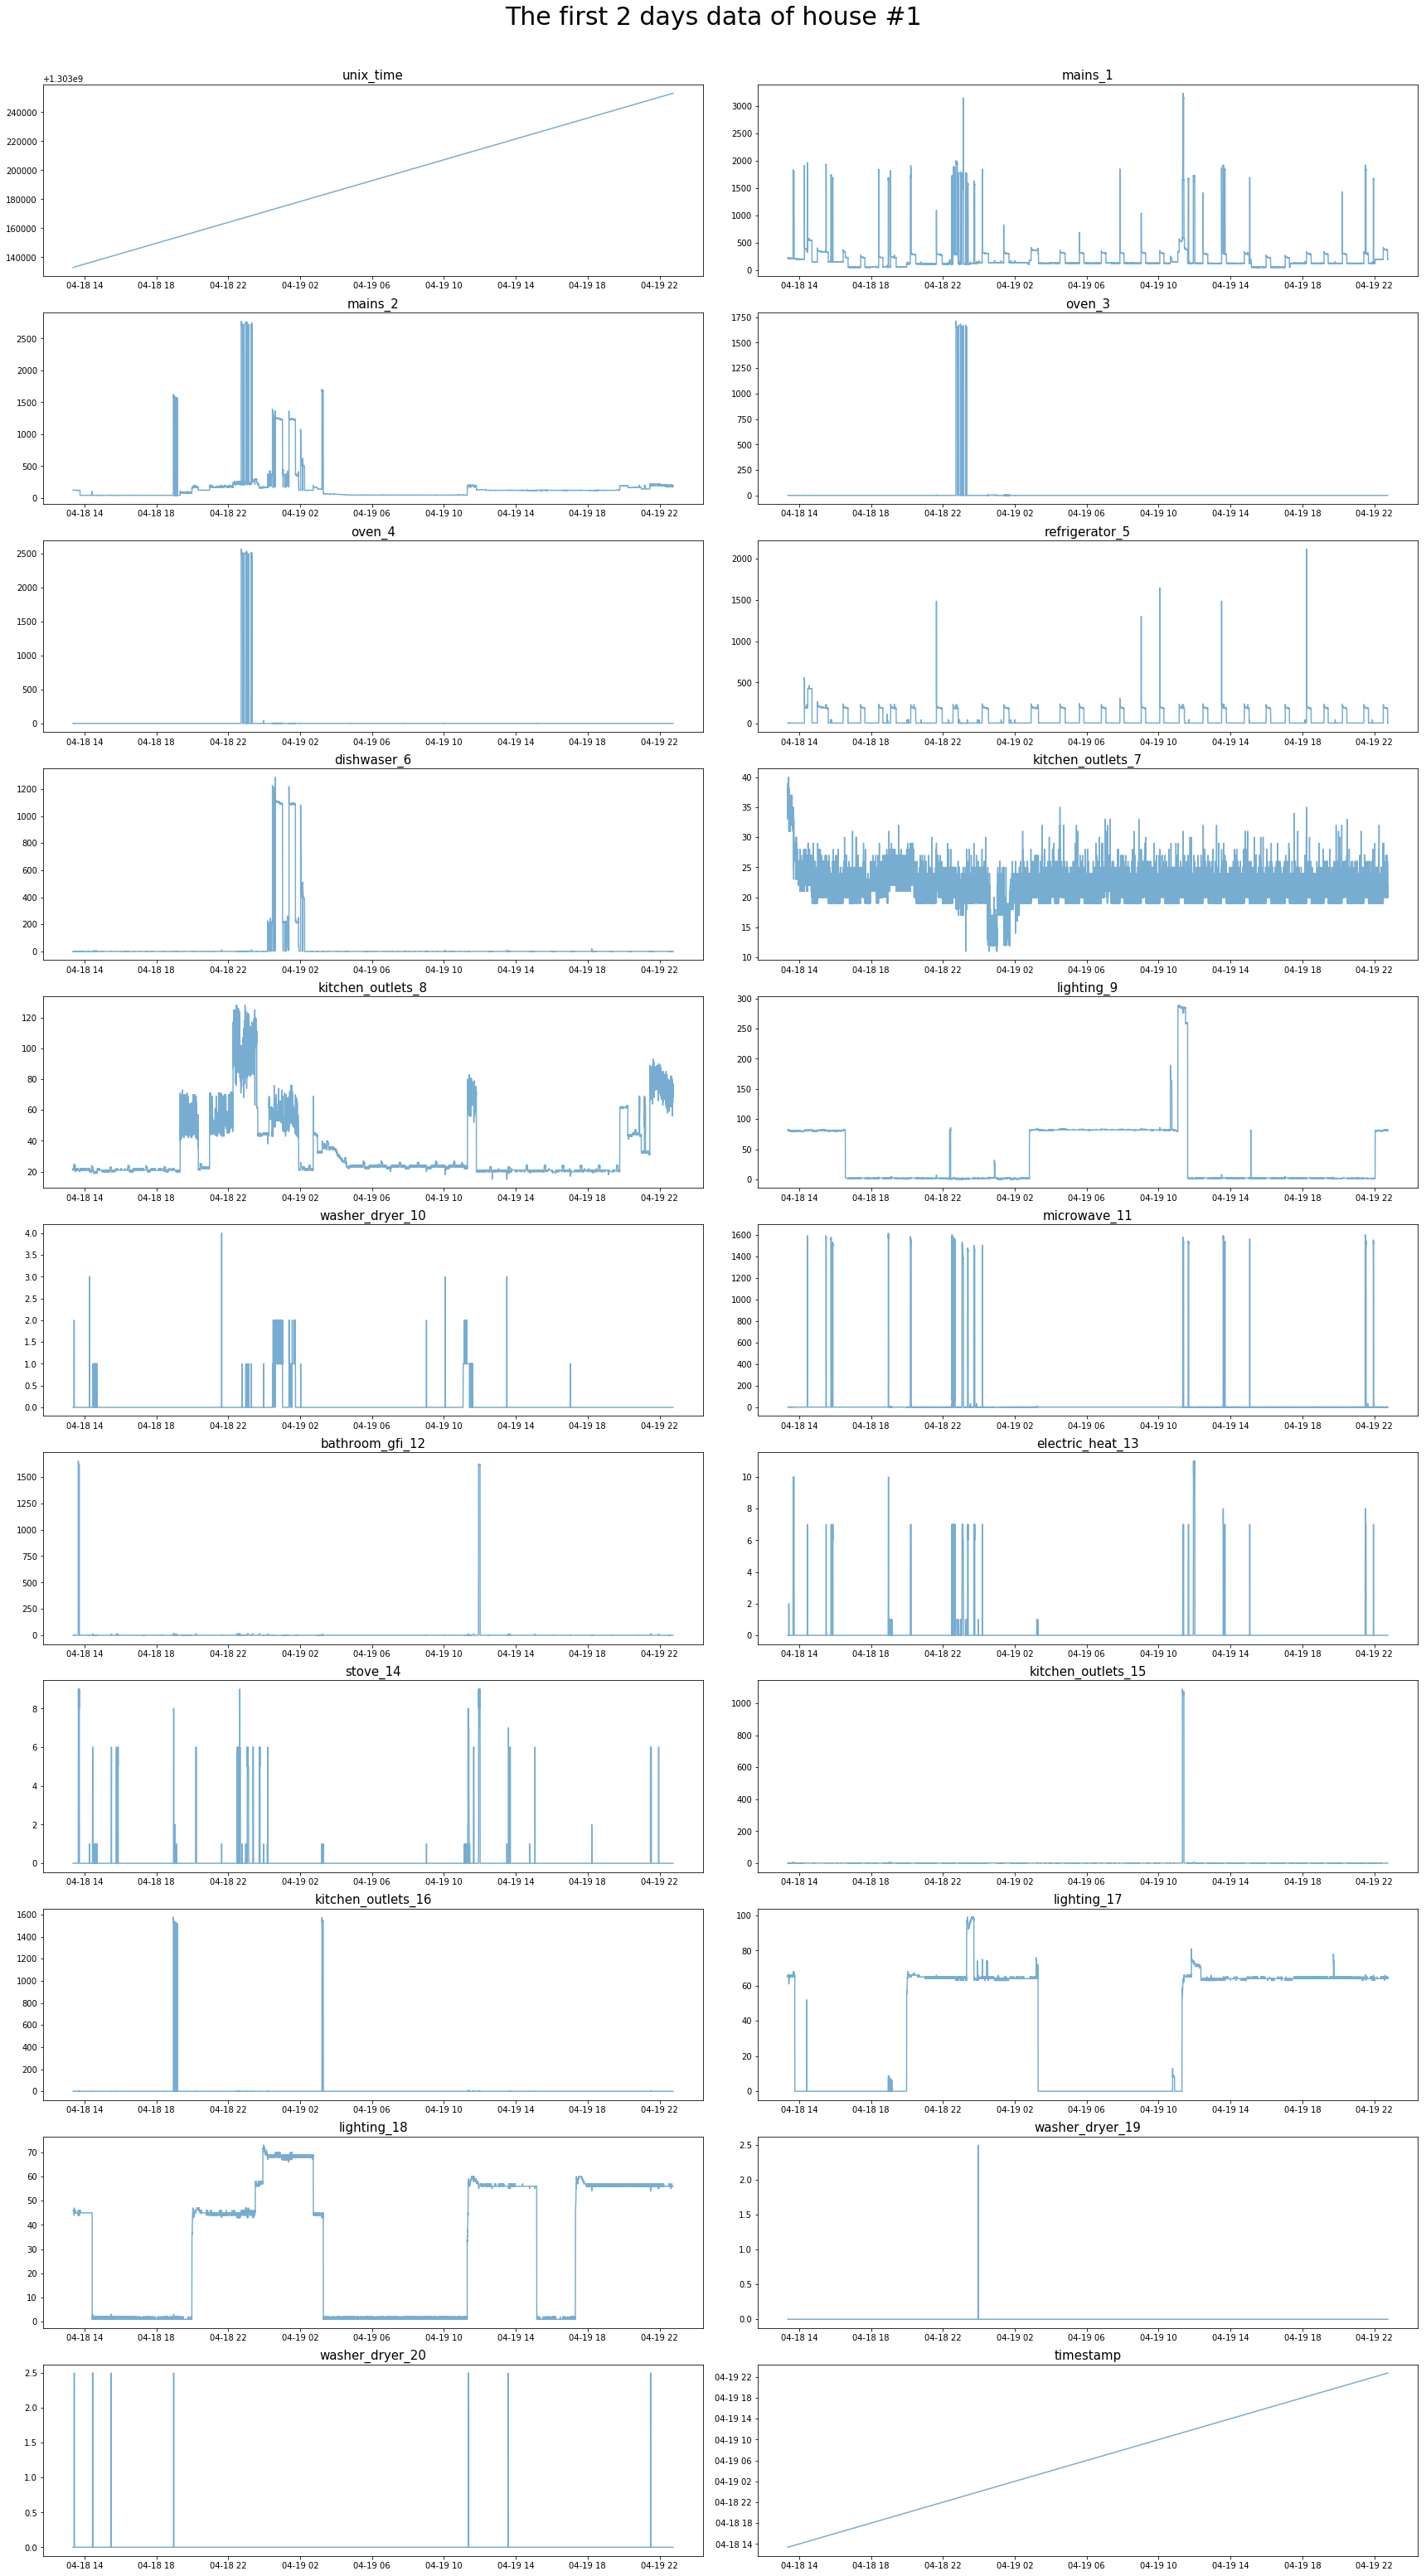

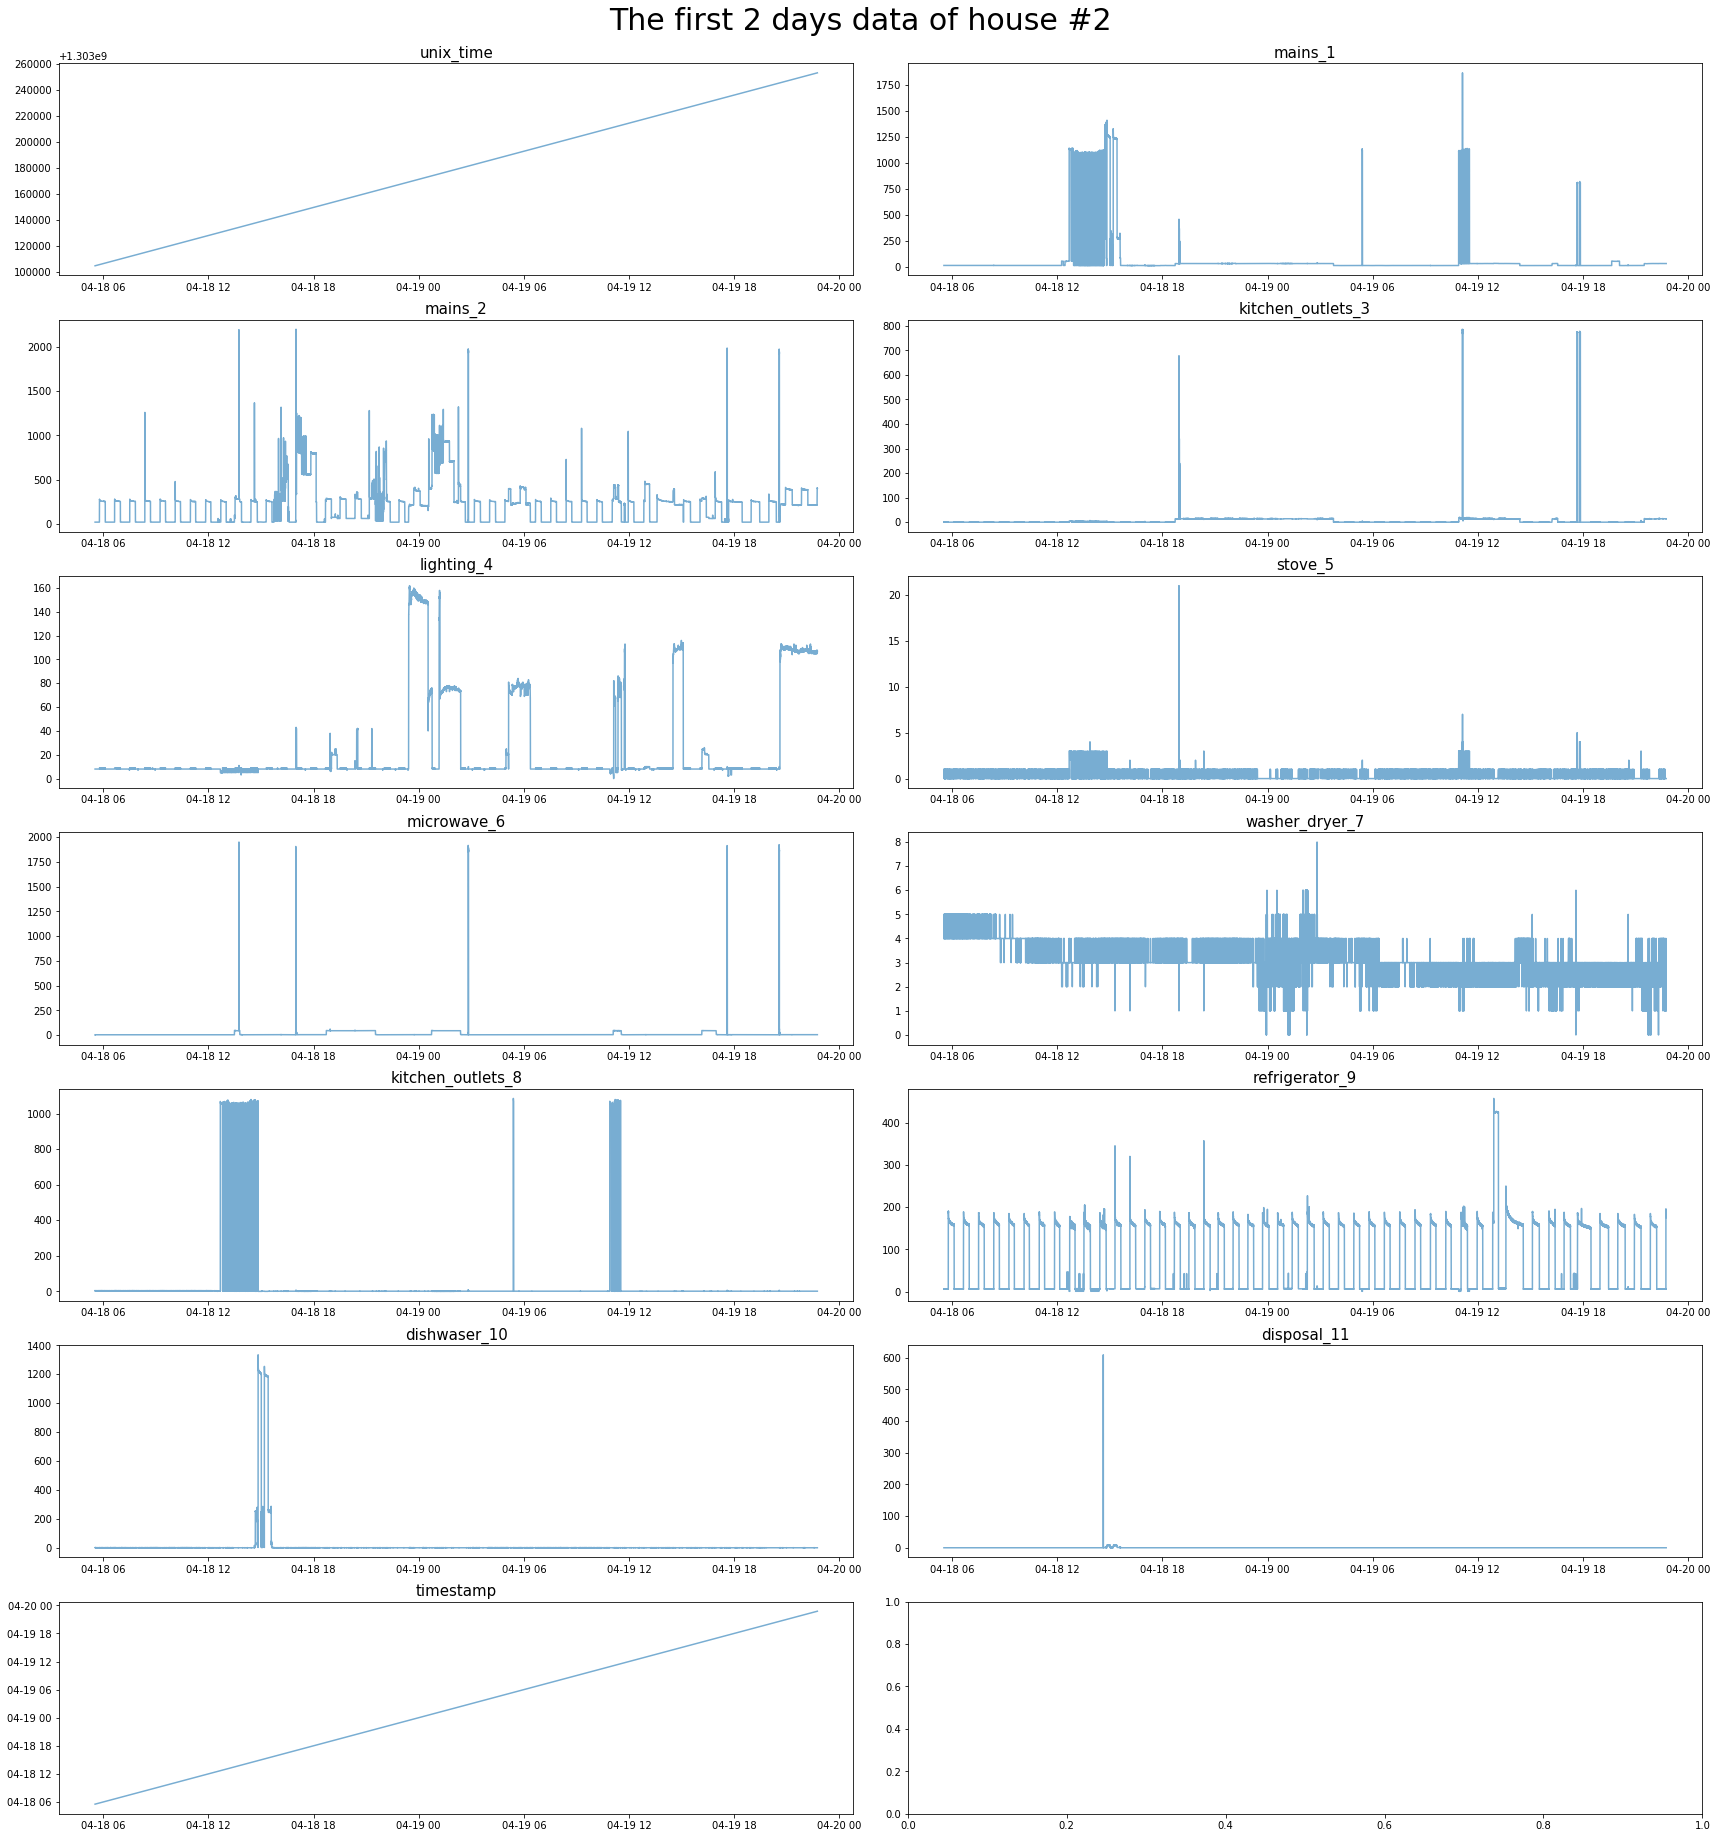

In [8]:
def plot_df(df, title):
    apps = df.columns.values
    num_apps = len(apps) 
    fig, axes = plt.subplots((num_apps+1)//2,2, figsize=(24, num_apps*2) )
    for i, key in enumerate(apps):
        axes.flat[i].plot(df[key], alpha = 0.6)
        axes.flat[i].set_title(key, fontsize = '15')
    plt.suptitle(title, fontsize = '30')
    fig.tight_layout()
    fig.subplots_adjust(top=0.95)

for i in range(1,3):
    plot_df(df[i].ix[:dates[i][1]], 'The first 2 days data of house #{}'.format(i))

Text(0.5,1,'House 2')

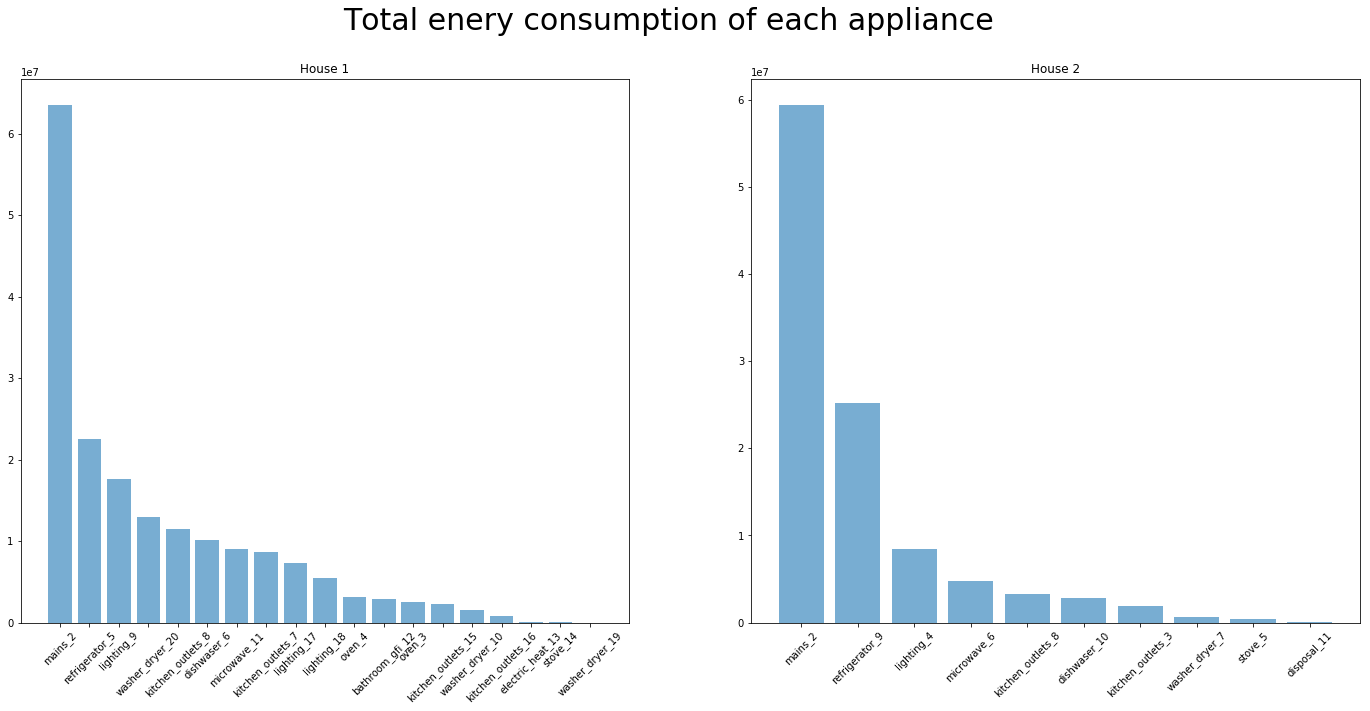

In [9]:
fig, axes = plt.subplots(1,2,figsize=(24, 10))
plt.suptitle('Total enery consumption of each appliance', fontsize = 30)
cons1 = df[1][df[1].columns.values[2:]].sum().sort_values(ascending=False)
app1 = cons1.index
y_pos1 = np.arange(len(app1))
axes[0].bar(y_pos1, cons1.values,  alpha=0.6) 
plt.sca(axes[0])
plt.xticks(y_pos1, app1, rotation = 45)
plt.title('House 1')

cons2 = df[2][df[2].columns.values[2:]].sum().sort_values(ascending=False)
app2 = cons2.index
y_pos2 = np.arange(len(app2))
axes[1].bar(y_pos2, cons2.values, alpha=0.6)
plt.sca(axes[1])
plt.xticks(y_pos2, app2, rotation = 45)
plt.title('House 2')

In [12]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.optimizers import Adam
from keras.regularizers import l2

Using TensorFlow backend.


In [18]:
#Separate house 1 data into train, validation and test data
df1_train = df[1].ix[:dates[1][10]]
df1_val = df[1].ix[dates[1][11]:dates[1][16]]
df1_test = df[1].ix[dates[1][17]:]
print('df_train.shape: ', df1_train.shape)
print('df_val.shape: ', df1_val.shape)
print('df_test.shape: ', df1_test.shape)

df_train.shape:  (214816, 22)
df_val.shape:  (104875, 22)
df_test.shape:  (87057, 22)


In [19]:
# Using mains_1, mains_2 to predict refrigerator
X_train1 = df1_train[['mains_1','mains_2']].values
y_train1 = df1_train['refrigerator_5'].values
X_val1 = df1_val[['mains_1','mains_2']].values
y_val1 = df1_val['refrigerator_5'].values
X_test1 = df1_test[['mains_1','mains_2']].values
y_test1 = df1_test['refrigerator_5'].values
print(X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape)

(214816, 2) (214816,) (104875, 2) (104875,) (87057, 2) (87057,)
